# 🧠 NeuroNet: MNIST Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os
sys.path.append(os.path.abspath(".."))
from data.mnist_loader import load_mnist
from models.neural_network import NeuralNetwork
from core.optimizers import SGD
from utils import compute_accuracy, plot_loss_curve, plot_accuracy_curve, plot_sample_predictions

# Load test data


In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist()
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (60000, 784) (60000, 10)
Test shape: (10000, 784) (10000, 10)


# Visualize Sample

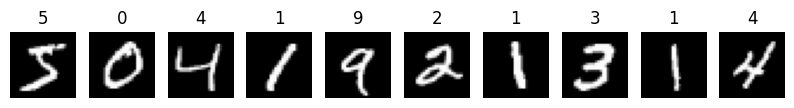

In [3]:
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(np.argmax(y_train[i]))
plt.show()

# Define architecture and initialize model


In [4]:
layers_config = [784, 128, 64, 10]
model = NeuralNetwork(layers_config=layers_config, loss_name="categorical_crossentropy", activation="relu")

# Initialize optimizer


In [5]:
optimizer = SGD(lr=0.01)

# Train model


In [6]:
history_loss = []
history_acc = []

epochs = 10
batch_size = 64

for epoch in range(epochs):
    model.fit(x_train, y_train, epochs=1, lr=0.01, optimizer=optimizer, batch_size=batch_size, verbose=False)
    y_pred = model.predict(x_test)
    acc = compute_accuracy(y_test, y_pred)
    loss = model.loss_fn(y_test, y_pred)
    history_loss.append(loss)
    history_acc.append(acc)
    print(f"Epoch {epoch+1}/{epochs} => Val Loss: {loss:.4f} | Val Acc: {acc:.4f}")

Epoch 1/10 => Val Loss: 0.7753 | Val Acc: 0.8647
Epoch 2/10 => Val Loss: 0.5717 | Val Acc: 0.9017
Epoch 3/10 => Val Loss: 0.5036 | Val Acc: 0.9146
Epoch 4/10 => Val Loss: 0.4518 | Val Acc: 0.9233
Epoch 5/10 => Val Loss: 0.4211 | Val Acc: 0.9285
Epoch 6/10 => Val Loss: 0.3912 | Val Acc: 0.9329
Epoch 7/10 => Val Loss: 0.3657 | Val Acc: 0.9360
Epoch 8/10 => Val Loss: 0.3510 | Val Acc: 0.9391
Epoch 9/10 => Val Loss: 0.3324 | Val Acc: 0.9420
Epoch 10/10 => Val Loss: 0.3192 | Val Acc: 0.9435


# Plot learning curves


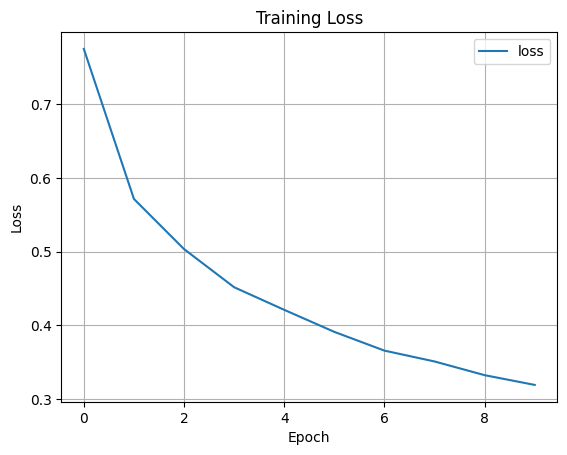

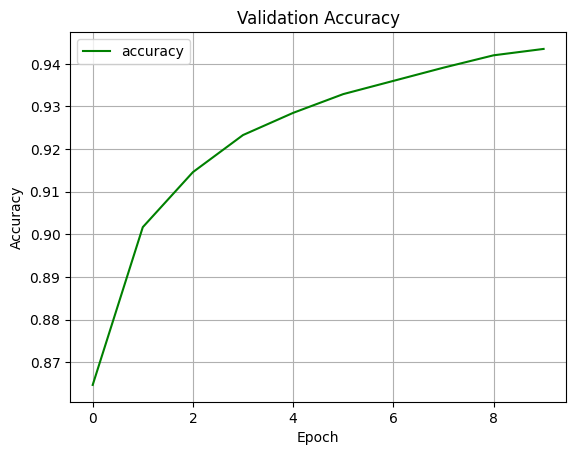

In [7]:
plot_loss_curve(history_loss)
plot_accuracy_curve(history_acc)

# Visualize predictions


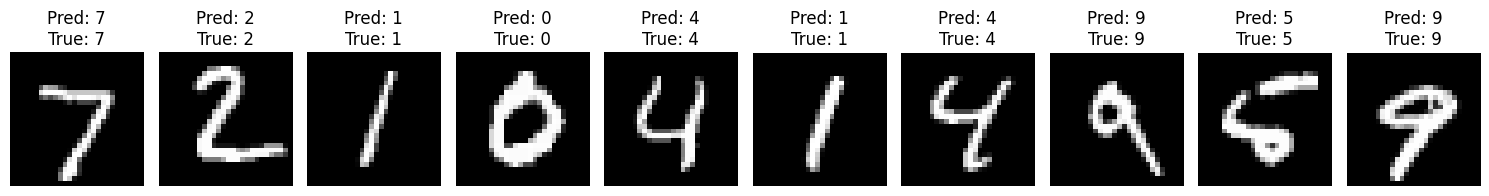

In [8]:
plot_sample_predictions(x_test, y_test, model.predict(x_test))